In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualisation
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
import os
for dirname, _, filenames in os.walk('gender_classification_v7.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [43]:
#Import data
data = pd.read_csv('gender_classification_v7.csv')

In [44]:
male = data[data.gender == "Male"]
female = data[data.gender == "Female"]

In [45]:
#Exploratory Data Analysis (EDA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [46]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


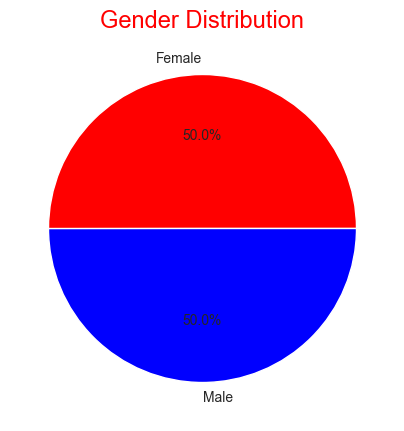

In [47]:
labels = data.gender.value_counts().index
color = ['red','blue']
explode = [0,0]
sizes = data.gender.value_counts().values


plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct="%1.1f%%")
plt.title(label="Gender Distribution", color="red",fontsize=17)
plt.show()

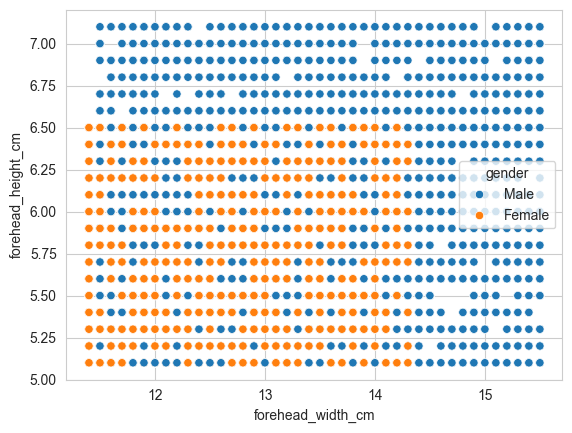

In [48]:
#males and females ratio is %50 %50.

sns.scatterplot(data=data,x="forehead_width_cm",y="forehead_height_cm",hue="gender")
plt.show()

In [49]:
male2=male.drop(["forehead_width_cm","forehead_height_cm","gender"],axis=1)
df_meltedmale = male2.melt(var_name='collumn')
female2=female.drop(["forehead_width_cm","forehead_height_cm","gender"],axis=1)
df_meltedfemale = female2.melt(var_name='collumn')

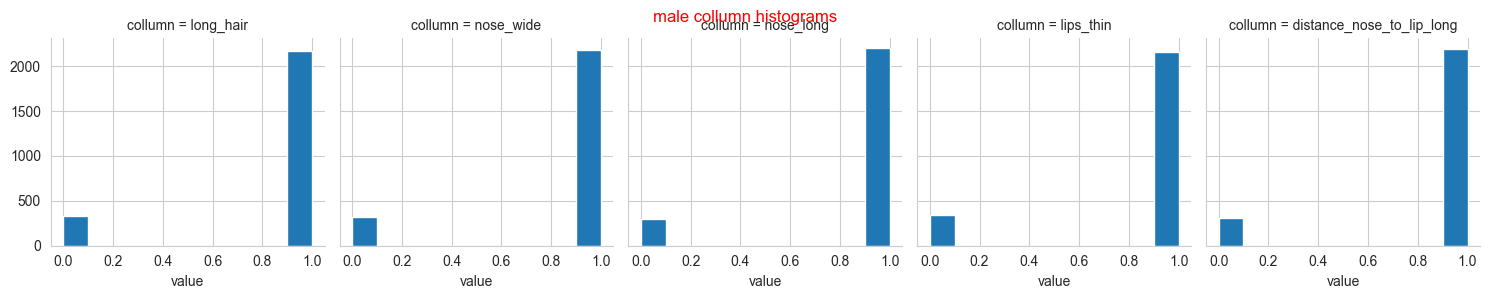

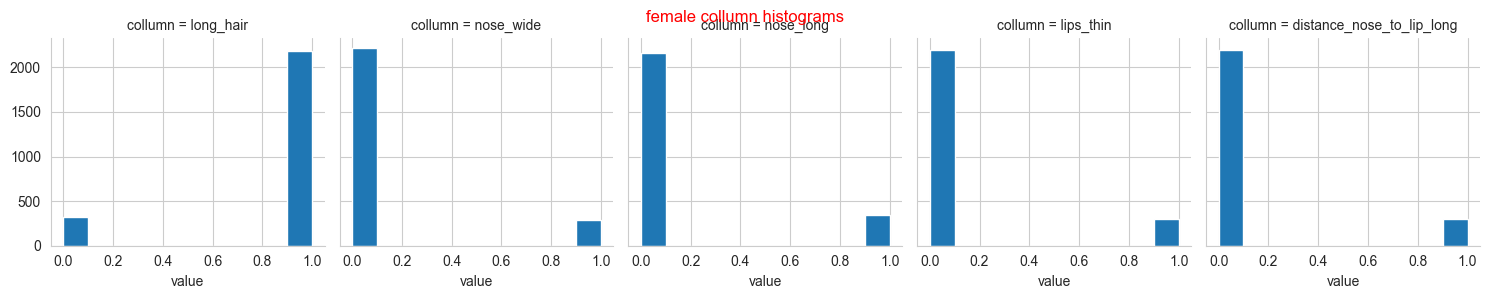

In [50]:
g = sns.FacetGrid(df_meltedmale, col='collumn',)
g.map(plt.hist, 'value')
g.fig.suptitle("male collumn histograms",color="red")
plt.show()
h = sns.FacetGrid(df_meltedfemale, col='collumn',)
h.map(plt.hist, 'value')
h.fig.suptitle("female collumn histograms",color="red")
plt.show()

In [51]:
male3=male.iloc[:,[1,2]]
df_meltedmale1 = male3.melt(var_name='collumn')
female3=female.iloc[:,[1,2]]
df_meltedfemale1 = female3.melt(var_name='collumn')

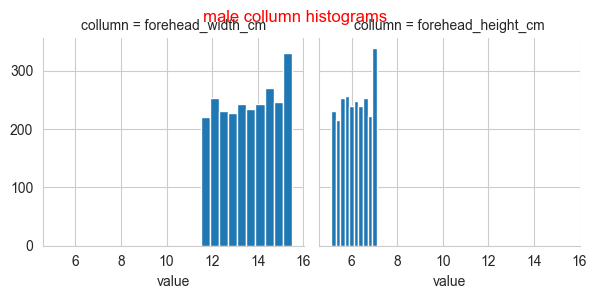

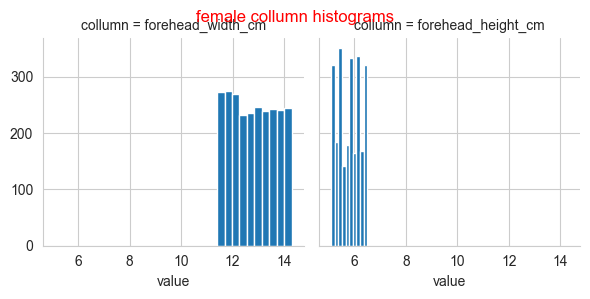

In [52]:
g = sns.FacetGrid(df_meltedmale1, col='collumn',)
g.map(plt.hist, 'value')
g.fig.suptitle("male collumn histograms",color="red")
plt.show()
h = sns.FacetGrid(df_meltedfemale1, col='collumn',)
h.map(plt.hist, 'value')
h.fig.suptitle("female collumn histograms",color="red")
plt.show()

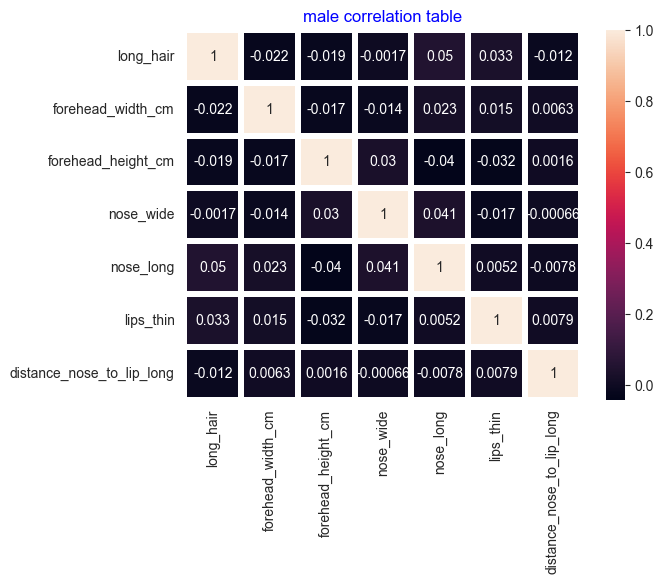

In [53]:
sns.heatmap(male.corr(numeric_only=True),annot=True,linewidths=3,)
plt.title("male correlation table",color="Blue")
plt.show()

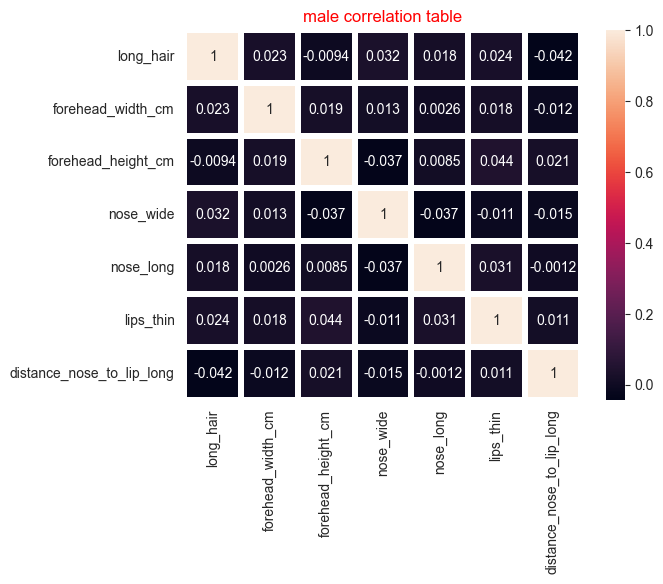

In [54]:
sns.heatmap(female.corr(numeric_only=True),annot=True,linewidths=3,)
plt.title("male correlation table",color="Red")
plt.show()

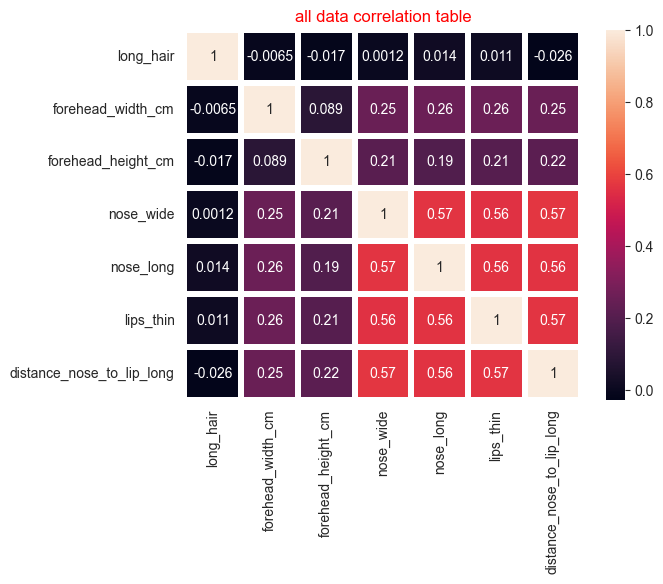

In [55]:
sns.heatmap(data.corr(numeric_only=True),annot=True,linewidths=3,)
plt.title("all data correlation table",color="Red")
plt.show()

In [56]:
#Creating Classification Models
data.gender = [1 if i=="Male" else 0 for i in data.gender]

In [57]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [58]:
x = data.drop(["gender"],axis=1)
y = data["gender"]

In [59]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
#Logistic Regression
#Accuracy: %96.40
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Logistic Regression score: {}".format(lr.score(x_test, y_test)))

Logistic Regression score: 0.9640239840106596


[[715  24]
 [ 30 732]]


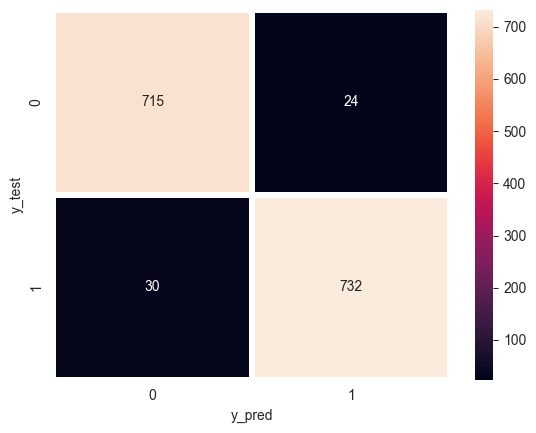

In [61]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [62]:
#KNN algorithm
#Accuracy: %97.00

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9593604263824117 


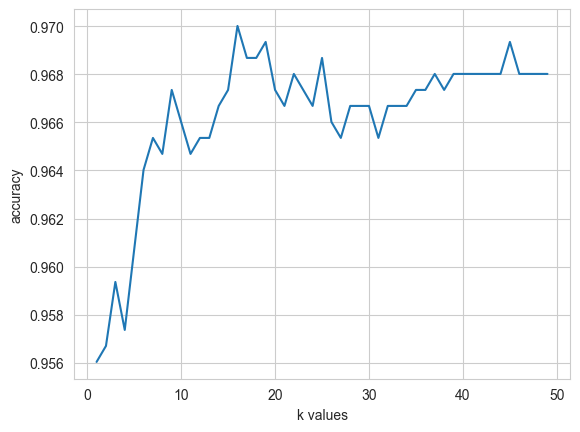

In [63]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn16 = KNeighborsClassifier(n_neighbors = 16) # n_neighbors = k
knn16.fit(x_train,y_train)
prediction = knn16.predict(x_test)
print(" {} nn score: {} ".format(16,knn16.score(x_test,y_test)))

 16 nn score: 0.9700199866755497 


[[729  10]
 [ 35 727]]


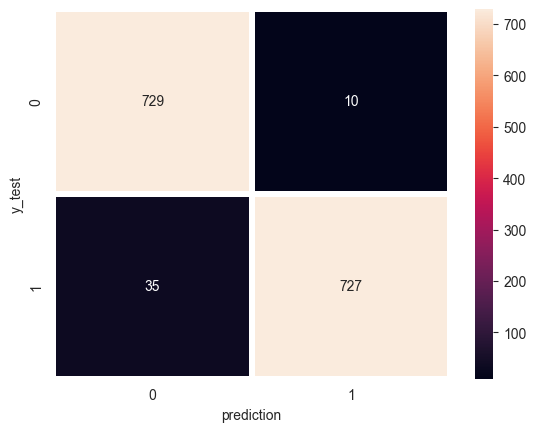

In [65]:
cf = confusion_matrix(y_test, prediction)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("prediction")
plt.ylabel("y_test")
plt.show()

In [66]:
#Naive Bayes
#Accuracy: %96.53

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)

print("Naive Bayes score: {}".format(nb.score(x_test, y_test)))

Naive Bayes score: 0.9653564290473018


[[715  24]
 [ 28 734]]


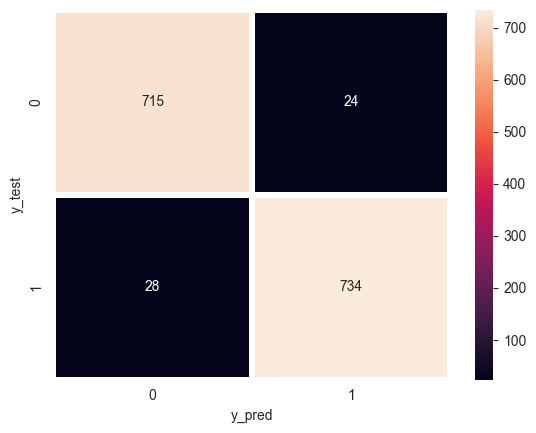

In [67]:
cf = confusion_matrix(y_test, y_pred)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [68]:
#SVM Algorithm
#Accuracy: %96.93
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

print("SVM Algorithm score: {}".format(svm.score(x_test, y_test)))

y_pred = svm.predict(x_test)

SVM Algorithm score: 0.9693537641572285


[[722  17]
 [ 29 733]]


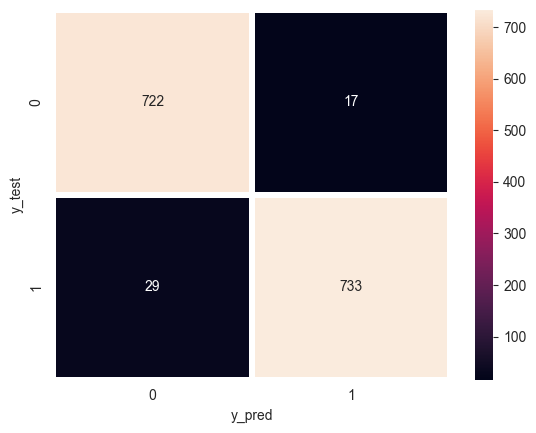

In [69]:
cf = confusion_matrix(y_test, y_pred)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [70]:
#Decision Tree Classification
#Accuracy: %95.73
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

print("Decision Tree Classification score: {}".format(dt.score(x_test, y_test)))

y_pred = dt.predict(x_test)

Decision Tree Classification score: 0.9573617588274483


[[709  30]
 [ 34 728]]


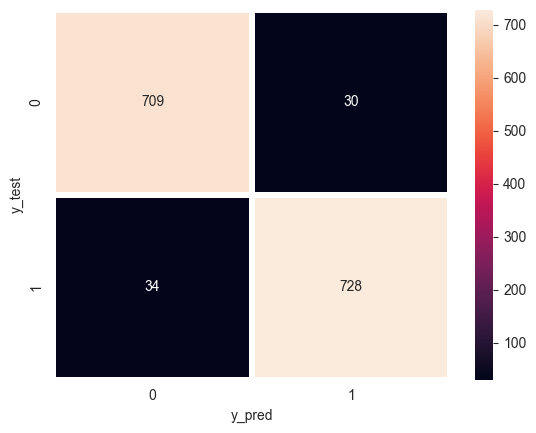

In [71]:
cf = confusion_matrix(y_test, y_pred)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [72]:
#Random Forest Classification
#Accuracy: %96.26
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=68, random_state=42)
rf.fit(x_train, y_train)
print("Random Forest Classification score: {}".format(rf.score(x_test, y_test)))

y_pred = rf.predict(x_test)

Random Forest Classification score: 0.9626915389740173


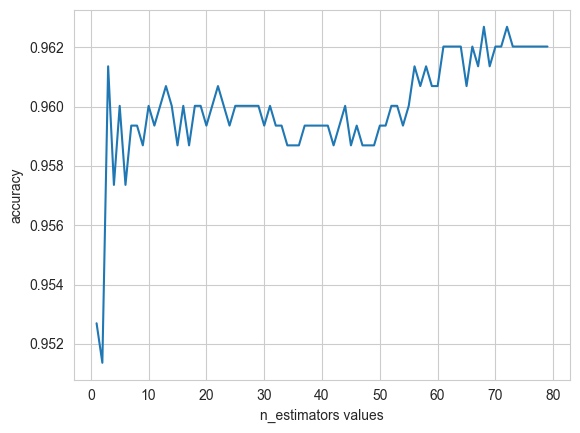

In [73]:
score_list = []
for each in range(1,80):
    rf = RandomForestClassifier(n_estimators=each, random_state=42)
    rf.fit(x_train, y_train)
    score_list.append(rf.score(x_test, y_test))
    
plt.plot(range(1,80),score_list)
plt.xlabel("n_estimators values")
plt.ylabel("accuracy")
plt.show()

[[715  24]
 [ 32 730]]


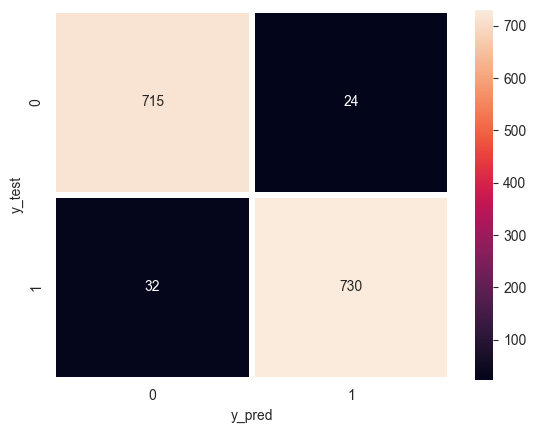

In [74]:
cf = confusion_matrix(y_test, y_pred)

print(cf)

from matplotlib import pyplot as plt
import seaborn  as sns

sns.heatmap(cf, annot = True, linewidths=3, fmt="0.0f")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [75]:
#%97 accuracy at best with KNN(k=16) algorithm.